# Contraste de hipótesis en dos poblaciones y ANOVA

En esta práctica nos centraremos en ver cómo podemos realizar algunos contrastes de hipótesis entre dos poblaciones en Python, así como a aplicar el análisis de ANOVA. ¡Vamos a ellos!

# Instalando los paquetes de Python adecuados e importándolos

Primero que nada, instalaremos algunos paquetes de Python que necesitaremos para la práctica. Aunque estos no vienen instalados por defecto en el entorno de Google Colab, pueden ser instalados fácilmente con *pip install nombre_paquete*. Además, importaremos algunas funciones y paquetes que sí están instalados por defecto en Google Colab como ahora *Pandas*, *Seaborn*, *Matplotlib*, o *Scipy*.

El siguiente fragmento de código realiza estas instalaciones e importaciones. Asegúrate de ejecutarlo cada vez que inicies este notebook de nuevo.

In [3]:
!pip install researchpy
!pip install statsmodels
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import math
from scipy import stats
import numpy as np
import researchpy as rp
import statsmodels.api as sm

# Cargando el conjunto de datos

Para esta práctica vamos a utilizar una muestra de películas disponibles en diferentes servicios de streaming como Netflix, Disney+, Prime Video y Hulu. 

El conjunto de datos se encuentra en un repositorio de Git, pero podemos cargarlo fácilmente con ayuda del paquete *requests* (empleado para realizar peticiones HTTP) y a través de *Pandas*. 

El siguiente fragmento de código carga el conjunto de datos en un *Dataframe*, que es la clase empleada en Pandas para el almacenamiento de datos tabulares. Ejecuta el código para cargar el conjunto de datos.

In [4]:
string_csv = requests.get("https://gitlab.com/drvicsana/ciencia-datos/-/raw/master/datasets/movies/movies.csv").content
string_stream = io.StringIO(string_csv.decode("utf-8"))
movies_df = pd.read_csv(string_stream)

Explora el conjunto de datos para ver las variables aleatorias de las que disponemos, así como su contenido. Emplea el comando *head* , *describe*, y el atributo *shape*.

In [5]:
#Tu código aquí
movies_df.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
#Tu código aquí
movies_df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [7]:
#Tu código aquí
movies_df.shape

(16744, 17)

Muchos de los registros que encontramos en el conjunto de datos tienen valores que faltan (e.g., *NaN*). Estos valores dificultarán bastante nuestros análisis posterioris, por lo que nos desharemos de aquellos registros que tengan algún valor inválido con el método *drop_na*. Fíjate en la cantidad de datos resultantes.

In [8]:
movies_df = movies_df.dropna()
movies_df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


Una de las columnas no tiene información interesante, ya que simplemente tenía el índice del registro en otro conjunto de datos (i.e., *Unnamed: 0*). Con el fin de preparar nuestro conjunto de datos, borraremos esta columna. Esto puede realizarse con el método *labels*. Este toma como argumentos *labels* (una lista con los nombres de columnas a borrar).

In [9]:
movies_df=movies_df.drop(labels=["Unnamed: 0"], axis=1)
movies_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


La columna *Country* tiene una lista de países que producieron la película. En esta lista, cada uno de los países se encuentra separado por comas. En base a esta variable categórica, crearemos una nueva variable categórica que simplifique la información contenida en *Country*. Más concretamente, la nueva variable categórica tendrá 3 categorías: *USA*, *USA Collab*, y *Other* para indicar películas exclusivamente producidas por Estados Unidos, películas coproducidas por Estados Unidos, y películas exclusivamente producidas por otros países. A esta nueva columna la llamaremos *country_category*. Para su creación sigue los siguientes pasos:
*  Crea una función que tome un string con países separados por comas y devuelva la categoría correspondiente: *USA*, *USA Collab* y *Other*.
*  Usa una combinación de los métodos *apply* y *assign* para crear la nueva columna. No olvides reasignar el nuevo *Dataframe* en *movies_df*

In [10]:
#Tu código aquí
def IS_USA(paises):
  list_paises = paises.split(',')
  if len(list_paises) > 1:
    for pais in list_paises:
      if pais == "United States":
        return "USA Collab"
      else:
        pass
  elif len(list_paises) == 1:
    return "USA"
  return "Other"
  

# crear nueva columna
movies_df = movies_df.assign(country_category = movies_df.apply( lambda row: IS_USA(row.Country),axis=1))
movies_df.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,country_category
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,USA Collab
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,USA
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,USA
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,USA
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Other


En el siguiente fragmento de código expandimos la columna *Genres* y creamos once columnas binarias con los 11 géneros más frecuentes en el conjunto de datos. Cada una de estas columnas binarias nos indica si la película en cuestión tiene el género deseado.

In [11]:
genres_to_consider=movies_df.Genres.apply( lambda x: x.split(",") ).explode().value_counts(normalize=True)[0:12].index.tolist()
for genre in genres_to_consider:
  r = movies_df.Genres.apply(lambda x: genre in x)
  movies_df=movies_df.assign( **{genre: r} )

movies_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,country_category,Drama,Comedy,Thriller,Romance,Adventure,Action,Crime,Family,Horror,Fantasy,Mystery,Sci-Fi
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,USA Collab,False,False,True,False,True,True,False,False,False,False,False,True
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,USA,False,False,False,False,False,True,False,False,False,False,False,True
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,USA,False,False,False,False,True,True,False,False,False,False,False,True
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,USA,False,True,False,False,True,False,False,False,False,False,False,True
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Other,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0,USA Collab,False,True,False,True,True,False,False,True,False,True,False,False
16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0,USA Collab,False,True,False,False,True,False,False,True,False,False,False,False
16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0,USA,False,True,True,False,False,False,True,True,False,False,False,False
16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0,USA,False,True,False,False,False,False,False,True,False,True,False,False


# Comparación de medias entre dos poblaciones normales o aproximadamente normales

Cuando comparamos dos poblaciones normales o aproximadamente normales, es bastante frecuente comparar sus medias para determinar si alguna de las dos poblaciones es preferible para nuestros intereses y objetivos. Existen múltiples contrastes de hipótesis que podemos llevar a cabo para comparar las medias de dos poblaciones normales a partir de sus muestras. En todos ellos, las hipótesis nulas y alternativas básicas son:

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

Dependiendo de si conocemos la varianza poblacional o no, y de si tenemos consideramos que las varianzas de ambas poblaciones son iguales o no, podemos aplicar pruebas diferentes (e.g., *z-test*, *t-test*) basadas en estadísticos diferentes. Sin embargo, el caso más habitual cuando nos enfrentamos a un conjunto de datos o muestra es que NO conozcamos nada con exactitud sobre la población general. Por ello, en la práctica lo más habitual cuando comparamos la media de dos poblaciones a partir de sus muestras es emplear el contraste de hipótesis basado en la t de Student. 

Este contraste de hipótesis asume que ambas poblaciones son normales, aunque para tamaños de muestra grandes la prueba basada en la t de Student también es robusta a desviaciones leves y moderadas de la normalidad. Por tanto, la muestra no necesita ser exactamente normal cuando apliquemos esta prueba, siempre que tengamos un tamaño grande de muestra.

Un primer paso para la aplicación de la prueba consiste en comprobar la normalidad de ambas poblaciones a partir de sus muestras. En este caso, vamos a hacer un ejemplo comparando la media de las puntuaciones en *IMDb* de las películas *Familiares* y de *Fantasía*, con el fin de determinar si alguno de los dos géneros tiende a recoger mejores críticas. Para comprobar la semejanza de la muestra a una normal, podríamos aplicar un test como el de *Shapiro-Wilk*, pero para tamaños de muestra grandes como el que tenemos, cualquier pequeña desviación de la normalidad haría rechazar la hipótesis nula, incluso aunque la distribución subyacente sea muy similar a la normal. Por ello, en este caso inspeccionaremos ambas poblaciones con histogramas y gráficos de probabilidad. Primero inspeccionaremos los histogramas.

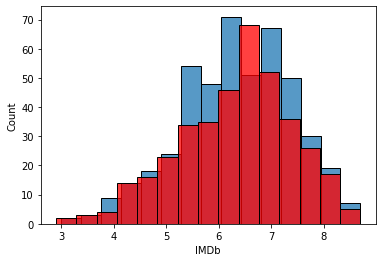

In [12]:
pop1 = movies_df[ movies_df.Family ].IMDb
pop2 = movies_df[ movies_df.Fantasy ].IMDb
sns.histplot(x=pop1)
sns.histplot(x=pop2, color="red")

Se observan ligeras asimetrías negativas en ambas muestras, aunque estas no parecen excesivamente grandes como para descartar el uso de la prueba basada en la t de Student. Ahora dibujaremos ambas muestras en un gráfico de probabilidad normal.

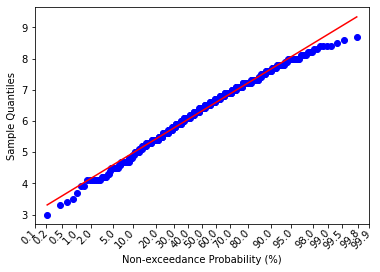

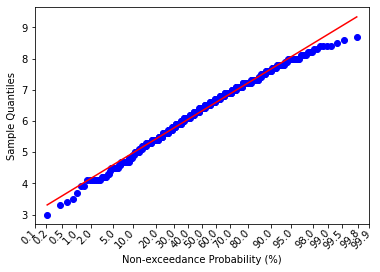

In [13]:
plot = sm.ProbPlot( pop1, dist="norm")
plot.probplot(line="r")

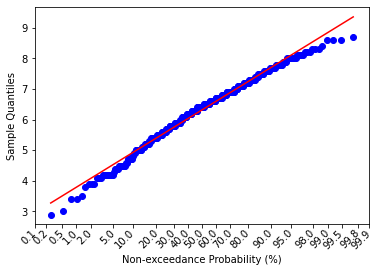

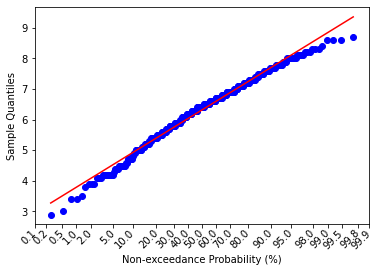

In [14]:
plot = sm.ProbPlot( pop2, dist="norm")
plot.probplot(line="r")

Para ambas poblaciones vemos que una gran parte central de los datos se ajusta a la recta, mientras que existen ciertos desajustes en las colas de las distribuciones. Esto nos indica que el comportamiento en las colas no se puede considerar normal, aunque de nuevo las diferencias no son excesivamente grandes. Estamos pues ante unas poblaciones que son aproximadamente normales. Por ello, procederemos con la aplicación de la prueba basada en la t de Student.

La prueba se encuentra implementada en el paquete *statsmodels* bajo en nombre de *ttest_ind*. Los parámetros obligatorios para este método son las dos poblaciones a analizar, y luego cuenta con una serie de parámetros adicionales que nos permiten modificar el comportamiento de la prueba:

* *alternative*: Puede ser *two-sided*, *larger* o *smaller* dependiendo de si la hipótesis alternativa es de dos colas ($\neq$) o una cola ($>$, $<$).
* *user_var*: Este argumento es cierto cuando se asume que ambas varianzas poblacionales son diferentes y falso en caso contrario.

Ejecutamos el test con nuestras dos muestras como podemos ver a continuación.


In [15]:
sm.stats.ttest_ind(pop1, pop2, alternative='two-sided', usevar='unequal')

(0.037692254763053316, 0.9699424399410428, 801.2625811375619)

La prueba devuelve el valor del estadístico de la t de Student, el p-valor, y los grados de libertad de la prueba. Como podemos ver con el p-valor y asumiendo un $\alpha=0.05$, no existen evidencias suficientes como para pensar que ambos géneros tienen calificaciones medias diferentes por parte de la crítica en *IMDb*.

Cuando queremos comparar el posicionamiento (i.e., si alguna de ellas tiende a ser mayor que la otra) de dos poblaciones que son posiblemente no normales, es mejor recurrir a pruebas no paramétricas. Una de estas pruebas es el *Wilcoxon rank sum test* o también conocido como prueba de *Mann-Whitney U*. En esta prueba, la hipótesis nula y alternativa establecen:

$H_0: P(x_i > y_j) = 1/2$, la probabilidad de encontrar valores más grandes de la primera población es exactamente 50%.

$H_1: P(x_i > y_j) \neq 1/2$, implicando esto que en una de las dos poblaciones tendemos a encontrar valores más grandes.

Cuando podemos asumir que la forma y varianza de ambas poblaciones es la misma, esta prueba también se puede utilizar como comparación de medianas. Con la hipótesis nula estableciendo que ambas medianas son iguales, y la hipótesis alternativa estableciendo lo opuesto. Si no se puede asumir, simplemente su interpretación es la hipótesis nula y alternativas antes mencionadas.

Para la ejecución de esta prueba de contraste de hipótesis, podemos ejecutar la función *mannwhitneyu* disponible en *scipy.stats*. La prueba devuelve el valor del estadístico asociado a la prueba así como su p-valor. A continuación tenemos un ejemplo de su aplicación.

In [16]:
stats.mannwhitneyu(pop1, pop2)

MannwhitneyuResult(statistic=88659.5, pvalue=0.4658995224845279)

No es sorprendente que la prueba no arroje evidencias para aceptar la hipótesis alternativa, ya que ambas muestras parecen situadas en la misma localización atendiendo a sus histogramas.

Ahora vas a poner en práctica lo aprendido. Vamos a comparar las calificaciones de *IMDb* de las películas del género *Drama* y *Horror* con el fin de intentar establecer si uno de los dos géneros recibe mejores puntuaciones de la crítica. Para ello:
* Comprueba la normalidad o cercanía a la normalidad de ambas poblaciones
 - Se puede observar con el papel probabilistico, histogramas y la t de student que ambas distribuciones parece que siguen una normal.
* Selecciona la prueba más apropiada para el tipo de poblaciones tratadas y el objetivo establecido
 - t de student.
* Interpreta el resultado de la prueba apoyándote en la propia prueba y en las medias o medianas de ambas muestras. ¿existen diferencias significativas? ¿consideras que la diferencia entre ambos géneros es **importante**? 
 - Observando que la hipotesis de Mann-Whitney nos dice que en Horror y en Drama encontramos que las dos distribuciones son diferentes, y sabiendo tambien que la media se va 1 punto de IMDb entre ambas, podemos decir que existen diferencias significativas. Si que pienso que la diferencia es importante, ya que la diferencia de 1 punto entre ambas puede considerarse relevante en una puntación de 10 puntos.

(13.324136133157587, 1.844927246193411e-35, 570.9948795006184)
MannwhitneyuResult(statistic=222418.0, pvalue=6.754328413221949e-39)
Mediana Drama  6.5
Mediana Horror  5.8
Media Drama  6.4485955056179725
Media Horror  5.710688836104505


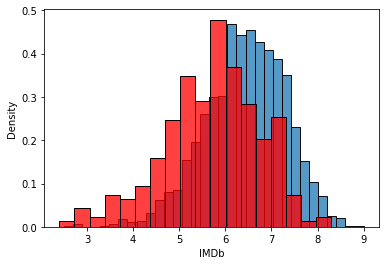

In [17]:
# Tu código aquí
pop1 = movies_df[ movies_df.Drama ].IMDb
pop2 = movies_df[ movies_df.Horror ].IMDb
sns.histplot(x=pop1, stat="density", common_norm=False)
sns.histplot(x=pop2, color="red", stat="density", common_norm=False)

print(sm.stats.ttest_ind(pop1, pop2, alternative='two-sided', usevar='unequal'))
print(stats.mannwhitneyu(pop1, pop2))
print("Mediana Drama ",pop1.median())
print("Mediana Horror ",pop2.median())
print("Media Drama ",pop1.mean())
print("Media Horror ",pop2.mean())

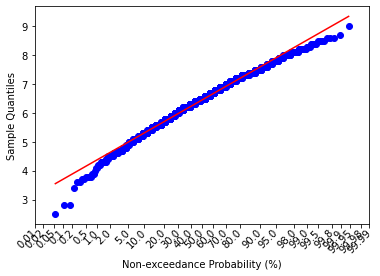

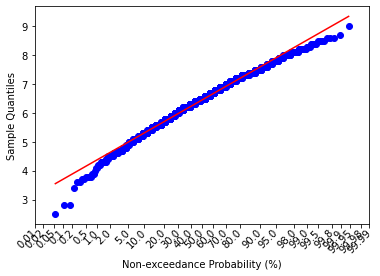

In [18]:
plot = sm.ProbPlot( pop1, dist="norm")
plot.probplot(line="r")

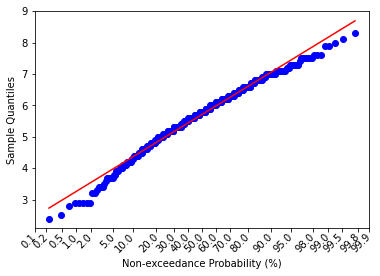

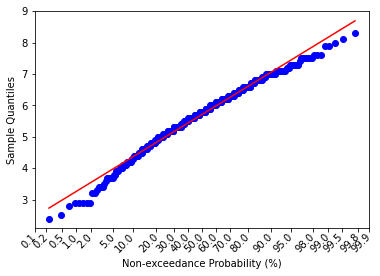

In [19]:
plot = sm.ProbPlot( pop2, dist="norm")
plot.probplot(line="r")

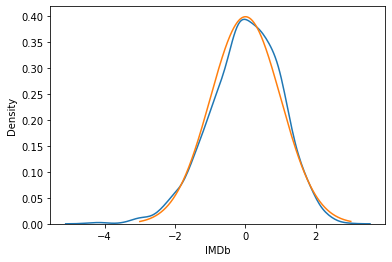

In [20]:
axes = sns.kdeplot( (pop1 - pop1.mean() )/(pop1.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

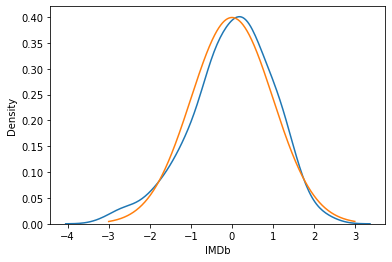

In [21]:
axes = sns.kdeplot( (pop2 - pop2.mean() )/(pop2.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

In [22]:
sm.stats.ttest_ind(pop1, pop2, alternative='two-sided', usevar='unequal')

(13.324136133157587, 1.844927246193411e-35, 570.9948795006184)

In [23]:
stats.mannwhitneyu(pop1, pop2)

MannwhitneyuResult(statistic=222418.0, pvalue=6.754328413221949e-39)

In [24]:
print(pop1.mean(), pop2.mean())

6.4485955056179725 5.710688836104505


Ahora haremos un nuevo análisis donde compararemos la duración (*Runtime*) de las películas de aventuras y ciencia ficción. Seguiremos de nuevo los pasos anteriores:

* Comprueba la normalidad o cercanía a la normalidad de ambas poblaciones
* Selecciona la prueba más apropiada para el tipo de poblaciones tratadas y el objetivo establecido
* Interpreta el resultado de la prueba apoyándote en la propia prueba y en las medias o medianas de ambas muestras. ¿existen diferencias significativas entre ambas poblaciones? Podemos decir que no es seguro que ambas distribuciones sigan una distribución normal. Para el analisis de diferencias entre Ciencia Ficción y Aventuras usaremos el test de Mann-Whitney. Entre ambas poblaciones, las diferencias no son muy notables, únicamente varia en 1 la diferencia de medias y ademas con los histogramas podemos ver que tienen una forma similar.

(-0.9194553072914778, 0.358174378870732, 699.5958103146928)
MannwhitneyuResult(statistic=81688.0, pvalue=0.13895502564968987)
Media Adventure  101.66788321167883
Media Sci-Fi  102.95833333333333


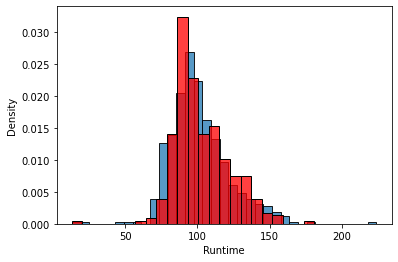

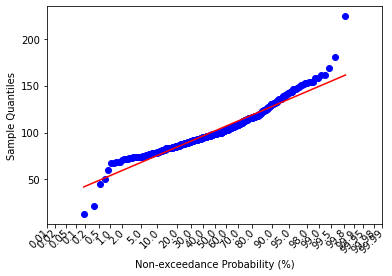

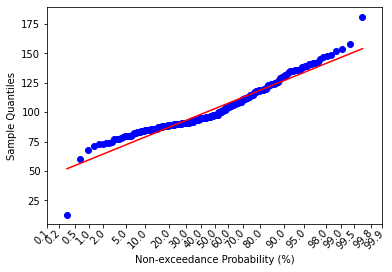

In [25]:
# Tu código aquí
pop1 = movies_df[ movies_df.Adventure ].Runtime
pop2 = movies_df[ movies_df["Sci-Fi"] ].Runtime
sns.histplot(x=pop1, stat="density", common_norm=False)
sns.histplot(x=pop2, color="red", stat="density", common_norm=False)

plot = sm.ProbPlot( pop1, dist="norm")
plot.probplot(line="r")
plot = sm.ProbPlot( pop2, dist="norm")
plot.probplot(line="r")

print(sm.stats.ttest_ind(pop1, pop2, alternative='two-sided', usevar='unequal'))
print(stats.mannwhitneyu(pop1, pop2))
print("Media Adventure ",pop1.mean())
print("Media Sci-Fi ",pop2.mean())

Vamos con un último ejemplo. Ahora compararemos la media de las puntuaciones en *IMDb* de las películas exclusivas del catálogo de Netflix con las películas exclusivas del catálogo de *Prime Video*. Seguiremos los mismos pasos que antes.

* Comprueba la normalidad o cercanía a la normalidad de ambas poblaciones
  - Observando los gráficos probabilisticos y los histogramas podemos ver que parece que siguen una distribución normal.
* Selecciona la prueba más apropiada para el tipo de poblaciones tratadas y el objetivo establecido
  - Mann-Whitney
* Interpreta el resultado de la prueba apoyándote en la propia prueba y en las medias o medianas de ambas muestras. ¿existen diferencias significativas entre ambas poblaciones? ¿son las diferencias **importantes**?
  - Observando los valores de las medias y del histograma se puede observar que hay una pequeña diferencia entre las dos poblaciones, por otra parte, los test y el histograma nos dice que las poblaciones son diferentes entre ellas. Diría que las diferencias no son importantes, no por nada, sino porque para Prime Video contamos con 1802 peliculas, mientras que para Netlix tenemos tan solo 1000, por lo que tal vez la diferencia en la forma de las poblaciones se deba a esta diferencia de valores.

Numero de peliculas de Netflix ->  1000
Numero de peliculas de Prime Video ->  1802
(4.7035146113715784, 2.7265364180588915e-06, 2063.597187642218)
MannwhitneyuResult(statistic=816333.5, pvalue=1.8219981768041663e-05)
Media Netflix  6.430400000000005
Media Prime Video  6.248723640399563


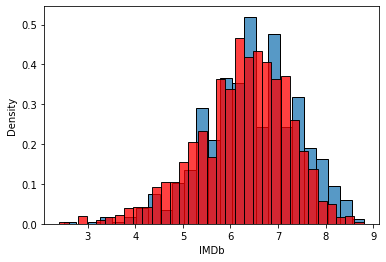

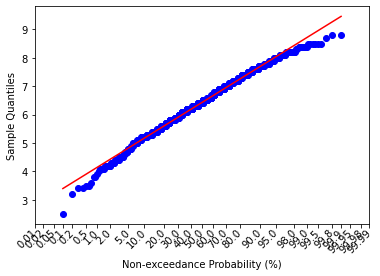

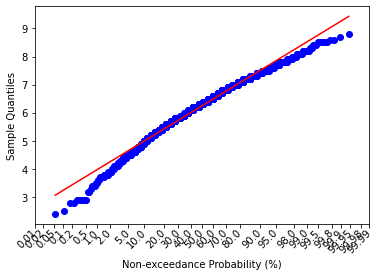

In [26]:
# Tu código aquí
pop1 = movies_df[ movies_df["Netflix"] == 1 ].IMDb
print("Numero de peliculas de Netflix -> ",movies_df[ movies_df["Netflix"] == 1 ].shape[0])
pop2 = movies_df[ movies_df["Prime Video"] == 1 ].IMDb
print("Numero de peliculas de Prime Video -> ",movies_df[ movies_df["Prime Video"] == 1 ].shape[0])
sns.histplot(x=pop1, stat="density", common_norm=False)
sns.histplot(x=pop2, color="red", stat="density", common_norm=False)

plot = sm.ProbPlot( pop1, dist="norm")
plot.probplot(line="r")
plot = sm.ProbPlot( pop2, dist="norm")
plot.probplot(line="r")

print(sm.stats.ttest_ind(pop1, pop2, alternative='two-sided', usevar='unequal'))
print(stats.mannwhitneyu(pop1, pop2))
print("Media Netflix ",pop1.mean())
print("Media Prime Video ",pop2.mean())

# Comparación de varianzas en poblaciones

Muchos tests paramétricos asumen la igualdad de varianzas entre poblaciones para su aplicación. Por tanto, a veces es necesario llevar a cabo un paso previo para comprobar la igualdad de varianzas entre dos posibles poblaciones para poder aplicar otras técnicas de inferencia estadística. En el caso de muestras pequeñas o medianas puede ser interesante realizar un contraste de hipótesis formal. Existen diferentes alternativas disponibles. En este caso emplearemos una prueba general: la prueba de Levene. Esta prueba es relativamente robusta ante desviaciones de la normalidad, por lo que suele ser una mejor elección en caso de no estar seguros de la normalidad de los datos frente a otras pruebas como Bartlett. Este contraste de hipótesis establece las siguientes hipótesis:

$H_0: \sigma_1 = \sigma_2 = \dots = \sigma_k$

$H_1: \exists i,j , \; \sigma_i \neq \sigma_k$

La prueba es aplicable a más de dos poblaciones, y rechazará la hipótesis nula cuando existan diferencias significativas entre las varianzas de al menos dos poblaciones. La aplicación de esta prueba en Python se realiza con la función *levene* disponible en *scipy.stats*. Ésta devuelve el valor del estadístico asociado y el p-valor de la prueba. A continuación, un ejemplo donde comprobamos si existen evidencias para pensar que las varianzas de las puntuaciones en *IMDb* de las películas del género de drama y horror tienen varianzas diferentes.

In [27]:
pop1 = movies_df[ movies_df.Drama ].IMDb
pop2 = movies_df[ movies_df.Horror ].IMDb
print(stats.levene(pop1, pop2))
print(pop1.std(), pop2.std())

LeveneResult(statistic=15.19212348787714, pvalue=0.0001000137669751469)
0.8905305619186247 1.0505575619839866


El contaste de hipótesis arroja que existen evidencias para pensar que las varianzas de ambas variables aleatorias son diferentes. También hemos impreso sus desviaciones típicas. La prueba nos ha arrojado que existen evidencias para pensar que ambas varianzas son diferentes, aunque a tenor de las desviaciones típicas de ambas muestras no parece que estas diferencias sean muy grandes. Debido a que tenemos un tamaño de muestra relativamente grande, la prueba ha detectado esta pequeña diferencia.

Ahora aplica lo aprendido para comprobar si tenemos evidencias para pensar que las varianzas de las puntuaciones de *IMDb* de las películas exclusivas de Netflix y Prime Video son diferentes.

El contraste de hipótesis arroja que no existen evidencias suficientes para pensar que las varianzas son diferentes.

In [28]:
#Tu código aquí
pop1 = movies_df[ movies_df["Netflix"] == 1 ].IMDb
pop2 = movies_df[ movies_df["Prime Video"] == 1 ].IMDb
print(stats.levene(pop1, pop2))
print(pop1.std(), pop2.std())

LeveneResult(statistic=0.3090776953808114, pvalue=0.5782911206791634)
0.9794156906518765 0.9797454780511912


#ANOVA con un factor y múltiples factores

Las técnicas de contraste de hipótesis nos permiten, habitualmente, hacer comparaciones entre dos poblaciones. No obstante, en muchas ocasiones deberemos comparar un parámetro poblacional para más de dos poblaciones. En esas situaciones es tentador aplicar un contraste de hipótesis por pares con el mismo valor de $\alpha$ para establecer un ranking entre las diferentes alternativas. Sin embargo, esta aproximación lleva a un error de tipo I mayor si consideramos todas las pruebas realizadas a nivel global. Es decir, teniendo en cuenta todas las comparaciones de pares, el nivel de significancia será mayor al $\alpha$ establecido para cada una de las comparaciones de pares.

Existen varios remedios a estas técnicas. Algunos de estas soluciones pasan por aplicar una corrección al nivel $\alpha$ de las pruebas (decrementarlo) de forma que la significancia global sea la deseada. Por ejemplo, la corrección de Bonferroni. Sin embargo, existen herramientas más convenientes para lidiar con este tipo de situaciones.

ANOVA es un ejemplo de este tipo de técnicas, especializadas en la comparación de múltiples poblaciones. Más concretamente, ANOVA busca diferencias significativas entre las medias de diferentes poblaciones. Es decir, las hipótesis que establece ANOVA son:

$H_0: \mu_1 = \mu_2 = \dots = \mu_k$

$H_1: \exists i,j \;\; \mu_i\neq \mu_j$

Se rechazará la hipótesis nula, que establece que las medias de todas las poblaciones son iguales, cuando existan evidencias de que al menos una de las medias poblacionales es diferente.

La forma más simple de aplicar ANOVA es con un único factor. Es decir, intentamos observar medias poblacionales diferentes en una variable de respuesta, atendiendo a los niveles o posibles valores de un factor. El análisis de ANOVA rechazará la hipótesis nula siempre que la media poblacional de la variable respuesta en uno de los niveles del factor sea significativamente diferente a otro de la media poblacional en otros de los niveles del factor. Antes de proceder a realizar un análisis por ANOVA con un factor, recordemos algunas de las asunciones necesarias para la aplicación de este tipo de análisis:

* Las variable de respuesta debe ser normal en cada uno de los niveles del factor. Sin embargo, el análisis de ANOVA es relativamente robusto a esta asunción. Esto es especialmente cierto para tamaños de muestra grandes. Por tanto, por regla general, este análisis se puede aplicar aunque las poblaciones sean aproximadamente normales.
* Existe homocedasticidad en la variable de respuesta para los diferentes niveles del factor. Esto significa a nivel teórico que todas las poblaciones deben tener la misma varianza poblacional. De nuevo, el análisis de ANOVA es relativamente robusto a esta hipótesis y se admiten pequeñas desviaciones.
* Las observaciones son independientes entre sí. Es decir, el valor de la variable aleatoria en una observación no debería influir en el valor de la variable aleatoria en las siguientes observaciones.

En esta práctica vamos a ver como aplicar ANOVA, así como la comprobación de las asunciones de partida del análisis. Para poder aplicar ANOVA en Python emplearemos el paquete *statsmodels*. Primero importamos las clases relevantes para realizar el análisis de ANOVA.

In [29]:
from statsmodels.formula.api import ols

Como un primer análisis, vamos a estudar el comportamiento de la calificación media en *IMDb* de las películas en servicios de streaming atendiendo a la clasificación de la película por edades. El siguiente fragmento de código muestra como realizar el análisis de ANOVA por un factor y la tabla del ANOVA.

In [30]:
lm = ols( 'IMDb ~ C(Age)', data=movies_df ).fit(cov_type="HC3")
anova_table = sm.stats.anova_lm(lm, typ=1,  robust="HC3")
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Age),4.0,52.232962,13.058241,13.469693,6.829642e-11
Residual,3296.0,3195.318610,0.969453,NaN,NaN


Vamos a desgranar un poco el código. Para realizar el análisis de ANOVA por mínimos cuadrados (*ordinary least squares*) empleamos la función *ols*, la cual creará las especificaciones del análisis. Esta función toma como parámetro el Dataframe sobre el cuál realizará el análisis (parámetro *data*) y una fórmula que se empleará para especificar qué factores se utilizarán en el estudio. En el ejemplo anterior esta fórmula es:

```python
IMDb ~ C(Age)
```

El nombre a la izquierda del símbolo ~ es la columna que contiene la variable dependiente o variable cuya respuesta media se quiere analizar. A la derecha del símbolo de ~ recogemos aquellos factores o variables que compondrán las subpoblaciones de estudio. En este caso, indicamos con *C(nombre_columna)* el nombre de la columna del *Dataframe* que queremos utilizar para dividir en subpoblaciones. La *C* indica que se trata de una variable categórica.

Una vez invocada la función, y especificado el análisis que queremos realizar, empleamos el método *fit* para indicar a Python que queremos realizar el análisis. El parámetro *cov_type=HC3* es una opción de configuración que aplica una versión modificada del ANOVA clásico, más robusta a la heterocedasticidad en las subpoblaciones.

Tras ello, podemos obtener la tabla del ANOVA llamando a la función *anova_lm*. Esta función toma como parámetros el análisis realizado. Adicionalmente se han gastado otros parámetros opcionales:
* *typ*: Indica el método a emplear para calcular la suma de cuadrados. Puede ser 1, 2 o 3. Estos parámetros son especialmente interesantes cuando tenemos poblaciones desbalanceadas con respecto al número de muestras. Para un diseño con un único factor se suele emplear el tipo 1, mientras que para diseños con múltiples factores se suelen gastar los tipos 2 y 3. Cuando las interacciones no son significativas, el tipo 3 suele ser más predictivo.
* *robust*: Indica si se debe aplicar algún tipo de corrección para que el análisis sea más robusto a la presencia de heterocedasticidad. En este caso empleamos el mismo tipo que hemos especificado en *fit*.

La tabla del ANOVA contiene una información similar a la de otras herramientas estadísticas. *sum_sq* es la suma de cuadrados, *df* son los grados de libertad, *F* es el valor del estadístico basado en la *F* de Snedecor, y *PR(>F)* es la probabilidad de observar valores tan extremos en el estadístico basado en la F de Snedecor. Es decir, el p-valor.

En el caso en que el análisis de ANOVA arroje que alguno de los niveles del factor tiene una media poblacional diferente al resto, es conveniente realizar un análisis a posterior para identificar de qué factor(es) se trata. Una forma de realizar este análisis es con la construcción de los intervalos de Tukey (Tukey HSD). Estos intervalos se solapan en caso de que no haya evidencias de diferencias significativas en las medias, mientras que no se solapan cuando sí las existen.

Podemos realizar este análisis empleando la función *pairwise_tukeyhsd* disponible en *statsmodels*. Esta función toma como parámetros la variable de respuesta y el factor bajo estudio, además del nivel *alpha* de significancia estadística. El análisis puede ser visualizado gráficamente mediante el método *plot_simultaneous* disponible en el propio objeto resultante del análisis. Éste toma como parámetro *comparison_name*, que es uno de los niveles del factor que se tomará como referencia a la hora de visualizar. Más concretamente, el intervalo asociado a este nivel aparecerá coloreado de azul en la gráfica. En gris aparecerán coloreados aquellos niveles cuyos intervalos se solapan con el nivel de referencia, por lo que no existen evidencias de diferencias significativas entre las medias de dichos niveles. En rojo aparecerán los intervalos que NO se solapan con el nivel de referencia, por lo que existen evidencias de diferencias significativas entre el nivel de referencia y estos niveles.

Por ejemplo, el siguiente fragmento de código construye los intervalos HSD de Tukey para un nivel de significancia $\alpha=0.01$ y se toma como nivel de referencia la categoría *18+*, que indica películas categorizadas para adultos. Como se puede observar, el intervalo se solapa con el intervalo de las películas categorizadas como *16+*. Por tanto, no se puede afirmar que las valoraciones medias en *IMDb* de las películas *16+* y *18+* en los servicios de streaming sean diferentes. Sin embargo, el intervalo asociado a las películas *18+* NO se solapa con el de las películas para todos los públicos (*all*), y las películas catalogadas como *7+* y *13+*. Esto indica que existen evidencias de medias poblaciones diferentes. Más concretamente, podemos decir que las películas para todos los públicos, para mayores de siete años, y para mayores de trece años disponibles en los servicios de streaming tienen una media de valoraciones mayor que las películas para adultos disponibles en estos servicios de streaming. Las diferencias, aunque significativas, no aparentan ser muy grandes ya que tan solo son unas pocas décimas. Recordad que debido a los grandes tamaños de muestra, somos capaces de detectar diferencias más pequeñas. Podemos realizar un análisis similar para el resto de niveles del factor.

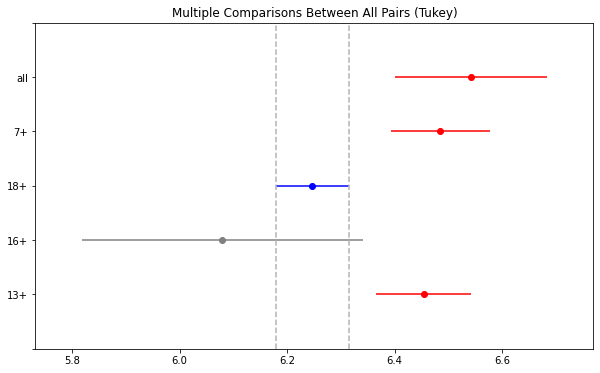

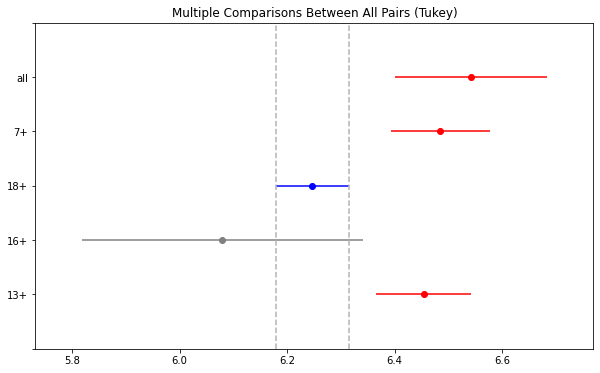

In [31]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(movies_df.IMDb, movies_df.Age, alpha=0.01)
tukey.plot_simultaneous(comparison_name="18+")

Una vez realizado el análisis de ANOVA, suele ser una buena práctica comprobar que se cumplen las asunciones establecidas por este propio análisis. Comenzamos con el análisis de las varianzas para cada uno de los niveles del factor. Podríamos aplicar una prueba de Levene con este propósito como en el siguiente fragmento de código.

In [32]:
populations = []
for (values, group) in movies_df.groupby(['Age']):
  p = movies_df.IMDb[ group.index ]
  populations.append(p)
  print( p.std() )
stats.levene(*populations)

0.9650222859464302
1.1505566476298201
0.9477258611064573
1.0399971530416774
1.069543772513756


LeveneResult(statistic=4.421220599703862, pvalue=0.0014489648927285543)

El resultado del análisis puede hacer saltar nuestras alarmas, ya que indica que existen evidencias de varianzas poblacionales diferentes y, por tanto, heterocedasticidad. Obviamente las varianzas o desviaciones típicas poblacionales NO van a ser las mismas **¿pero son las diferencias realmente importantes?** Recordemos que contamos con unos tamaños de muestra relativamente grandes, por lo que vamos a poder identificar como significativas diferencias pequeñas entre los parámetros poblacionales. Las desviaciones típicas han sido impresas en el proceso anterior. Como se ve, las diferencias entre los pares de varianzas muestrales no son grandes, por lo que las diferencias a nivel poblacional para los tamaños de muestra tratados tampoco deberían serlos.

Quizás una herramienta bastante útil a la hora de determinar la posible heterocedasticidad de las poblaciones cuando trabajamos con muestras grandes es el análisis de los residuos. Cuando existe homocedasticidad, la media de los residuos para cada uno de los niveles del factor debería estar aproximadamente centrada en cero. Además, la desviación de los residuos debería tener aproximadamente la misma amplitud. La siguiente gráfica pinta la media muestral de los residuos para cada uno de los niveles del factor, así como una barra con su desviación típica muestral. Como podemos observar, los residuos se encuentran aproximadamente centrados alrededor del cero y la longitud de las barras es similar.

Además, se debe recordar que ANOVA es robusto a cierta disimilitud entre las varianzas, además de que hemos aplicado una variante de ANOVA más robusta a este tipo de problemas.

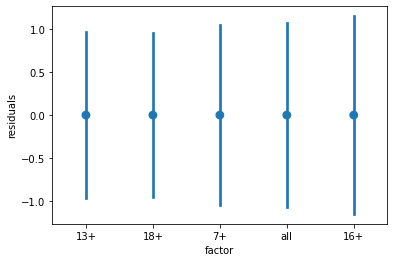

In [33]:
residuals = lm.resid
sns.pointplot( data=movies_df.assign(residuals=residuals, factor=movies_df.apply(lambda row: row.Age, axis=1)), x="factor", y="residuals", ci="sd", join=False )

El siguiente paso es comprobar la normalidad de las subpoblaciones. Podríamos aplicar un test de normalidad a cada una de las poblaciones, aunque esto presentaría problemas similares a los anteriormente comentados (e.g., tamaño de muestra, distribuciones aproximadamente normales, etc.). Una forma de proceder a la hora de comprobar si la hipótesis de normalidad se cumple consiste, de nuevo, en analizar los residuos del análisis. Más concretamente, cuando las subpoblaciones son normales, los residuos también deberían serlo. Por tanto, representamos los residuos en un histograma, en un gráfico de probabilidad normal, y hacemos un ajuste de la función de densidad para compara con la normal. Evidentemente, los residuos no son exactamente normales a la vista del histograma, gráfico de probabilidad normal, y la función de densidad estimada. No obstante, su comportamiento no difere mucho del de una normal. Por ello, y dado que ANOVA es robusto a ciertas desviaciones de la normalidad, podemos asumir que nuestro análisis no viola las asunciones del análisis de ANOVA.

El análisis de independencia no se realiza en este caso ya que, obviamente, las valoraciones son independientes entre sí y no siguen ningún patrón que dependa de las observaciones anteriores.

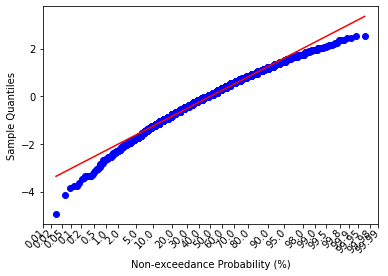

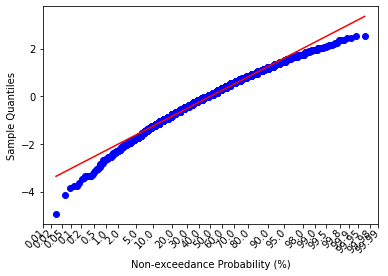

In [86]:
plot = sm.ProbPlot(residuals, dist="norm")
plot.probplot(line="r")

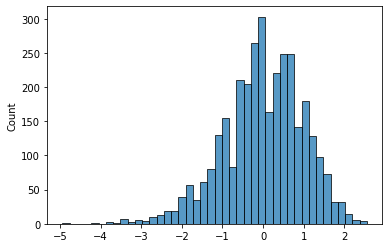

In [87]:
sns.histplot(residuals)

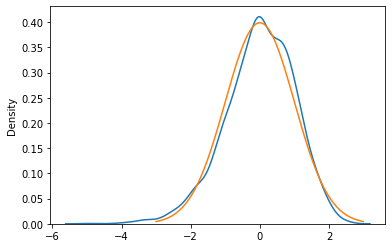

In [88]:
axes = sns.kdeplot( (residuals - residuals.mean() )/(residuals.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

Ahora, realiza un análisis de ANOVA con un factor tomando como variable de respuesta las calificaciones en *IMDb* y como factor a analizar la decada en la que se publicó la película. Hemos preparado un nuevo *Dataframe* (*new_df*) para facilitar esta tarea.

**En base al análisis de ANOVA realizado ¿existen diferencias significativas en la media en IMDb de las películas en streaming atendiendo a su década? ¿nos podemos fiar de las conclusiones del análisis?**
 - Según parece en la tabla de ANOVA, parece que alguna media es diferente. Y sacando los intervalos de Tukey esto se comprueba.

In [34]:
def get_decade(year):
  return year//10 * 10

movies_df = movies_df.assign(decade= movies_df.Year.apply(get_decade) )
new_df = movies_df[ (movies_df.decade>1970) & (movies_df.decade<2020) ]

In [54]:
# Tu código aquí
lm = ols( 'IMDb ~ C(decade)', data=new_df ).fit(cov_type="HC3")


anova_table = sm.stats.anova_lm(lm, typ=1,  robust="HC3")
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(decade),3.0,6.950265,2.316755,2.360496,0.069563
Residual,3051.0,2994.463732,0.981470,NaN,NaN


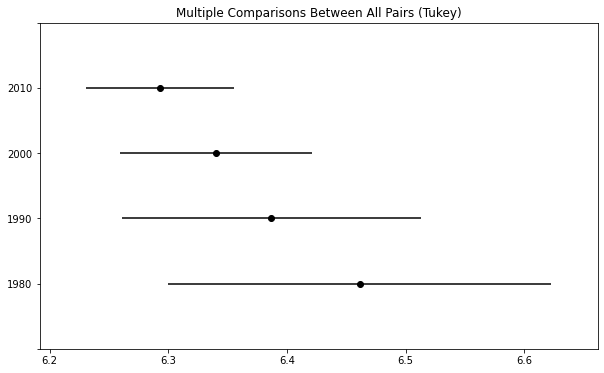

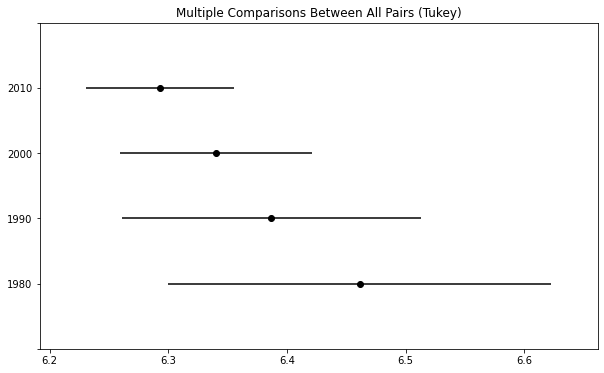

In [55]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(new_df.IMDb, new_df.decade, alpha=0.01)
tukey.plot_simultaneous()

Ahora aprenderemos a realizar análisis de ANOVA con múltiples factores. Cuando consideramos más de un factor, los efectos individuales de cada uno de esos factores pueden ser importantes sobre la media de la variable de respuesta, pero también la interacción existente entre los valores de dichos factores.

En este caso vamos a analizar el efecto del país de producción de la película (*country_category: USA, USA Collab, Other*) y de la categorización de la película como adulta (crearemos una nueva columna para crear esta categorización) en la calificación media obtenida por las películas en streaming en *IMDb*. Los pasos a aplicar no cambian mucho con respecto al caso de un factor. Veamos un ejemplo.

In [59]:
movies_df = movies_df.assign( Adult= movies_df.Age.apply(lambda x: x=="18+") )
lm = ols( 'IMDb ~ C(Adult) + C(country_category) + C(Adult)*C(country_category)', data=movies_df ).fit(cov_type="HC3")
anova_table = sm.stats.anova_lm(lm, typ=2, robust="HC3")
anova_table

,sum_sq,df,F,PR(>F)
C(Adult),38.704877,1.0,40.038113,2.826767e-10
C(country_category),30.397357,2.0,15.722215,1.600675e-07
C(Adult):C(country_category),3.079358,2.0,1.592715,2.035292e-01
Residual,3185.279241,3295.0,NaN,NaN


La fórmula ha cambiado tal y como podemos observar:

```python
IMDb ~ C(Adult) + C(country_category) + C(Adult)*C(country_category)
```

En la fórmula aparecen sumados a la derecha del símbolo de ~ cada uno de los factores que queremos contemplar para el análisis de ANOVA. Además de esto, como vamos a estudiar también la interacción entre ambos factores, esta aparece representada por la multiplicación (ojo, el símbolo * no significa multiplicación literal, sino que es una forma de representar la interacción entre ambos factores) de ambos factores categóricos.

Como vamos a analizar la significancia de la interacción, emplearemos la suma de cuadrados de tipo II (*typ=2*), ya que suele ser más potente cuando creemos que la interacción puede ser significativa. 

Tras analizar los resultados podemos ver que la interacción NO es significativa (p-valor=0.187) si consideramos un nivel de significancia de $\alpha=0.05$, por lo que podemos repetir el análisis de ANOVA para la suma de cuadrados de tipo III (*typ=3) ya que hemos determinado que la interacción no es significativa.



In [58]:
lm = ols( 'IMDb ~ C(Adult) + C(country_category) + C(Adult)*C(country_category)', data=movies_df ).fit(cov_type="HC3")
anova_table = sm.stats.anova_lm(lm, typ=3, robust="HC3")
anova_table

,sum_sq,df,F,PR(>F)
Intercept,5829.015738,1.0,6029.803167,0.000000
C(Adult),2.022926,1.0,2.092608,0.148108
C(country_category),9.655711,2.0,4.994157,0.006829
C(Adult):C(country_category),3.079358,2.0,1.592715,0.203529
Residual,3185.279241,3295.0,NaN,NaN


Los factores simples sí que han resultado significativos, por lo que estudiaremos individual la significancia de los niveles de cada uno de estos factores con intervalos HSD de Tukey. Comenzamos para el factor *country_category*

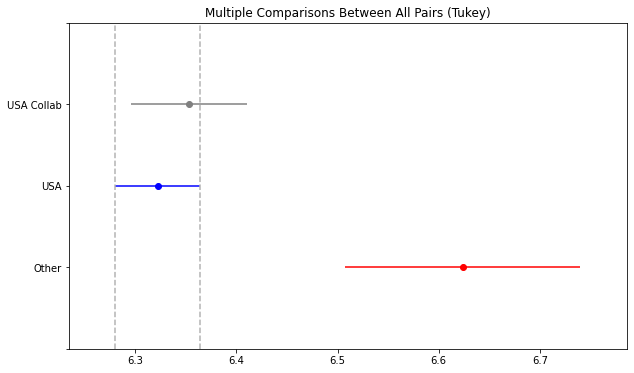

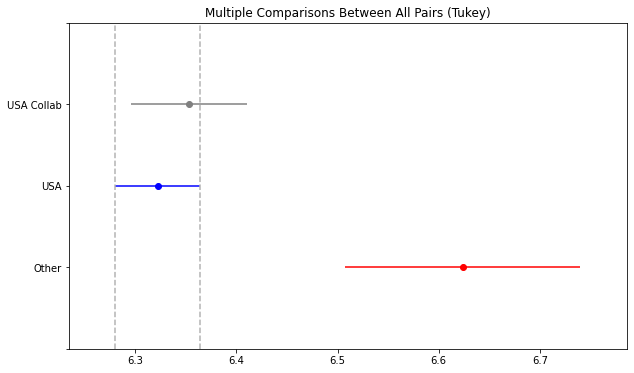

In [60]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(movies_df.IMDb, movies_df.country_category, alpha=0.05)
tukey.plot_simultaneous(comparison_name="USA")

Como vemos, no existen diferencias significativas entre las medias para las producciones realizadas en Estados Unidos y las coproducidas por Estados Unidos. No obstante, sí existen diferencias significativas entre las puntuaciones de las producciones extranjeras disponibles en estos servicios de streaming y las producciones nacionales. La diferencia de nuevo no parece muy grande en magnitud. No obstante, ¿crees que podrías hipotetizar de forma razonable a qué se deben estas diferencias? Muchos de estos servicios de streaming suelen incluir un amplio catálogo nacional (de diferentes niveles de calidad), y suelen incluir producciones extranjeras únicamente cuando son relativamente buenas. Por tanto, parece razonable que exista cierto sesgo introducido por la toma de decisiones de estas plataformas. Una de las tareas como científico de datos es precisamente intentar ir más allá del resultado del test estadístico para desgranar la información que nos están aportando los datos y su sentido o no en la práctica. Fijémonos en que NO hemos pintado los intervalos de Tukey para el factor *Adult*. Esto es debido a que únicamente tiene dos niveles, por lo que si existen diferencias significativas entre las medias de los niveles del factor, estas diferencias deben estar necesariamente entre esos dos niveles. Podemos hacer una fácil comparación viendo sus medias.

In [61]:
print( movies_df[movies_df.Adult].IMDb.mean(), movies_df[movies_df.Adult==False].IMDb.mean() )

6.24723378941107 6.4577160493827135


En caso de que la interacción hubiera resultado significativa estadísticamente, hubiera sido interesante realizar un gráfico de interacciones. En estos gráficos se representan las medias para cada una de las combinaciones de los niveles de los factores. 

Estos gráficos los podemos construir con la función *interaction_plot* disponible en *statsmodels*. En el parámetro *response* indicamos la columna que constituye la variable de respuesta, *x* es el factor cuyos valores queremos representar en el eje X, y *trace* es el factor que emplearemos para construir tantas líneas como valores tenga dicho factor. En el siguiente ejemplo construimos un gráfico de interacción tomando como variable de respuesta la puntuación en *IMDb*, representamos en el eje X los posibles valores de la variable *country_category* (Other, USA, USA Collab), y en trace indicamos que queremos tantas líneas como valores tenga el factor *Adult* (True o False).

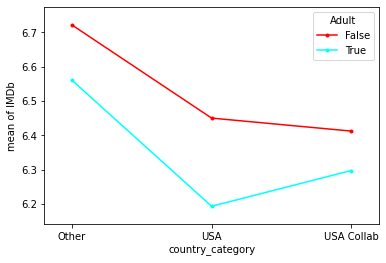

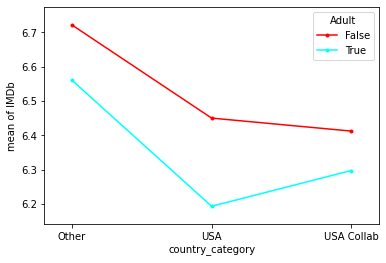

In [62]:
sm.graphics.interaction_plot(x=movies_df.country_category, trace=movies_df.Adult, response=movies_df.IMDb)

En el gráfico de interacciones anterior podemos ver cómo las líneas son aproximadamente paralelas entre sí, algo indicativo de que la interacción no es fuerte y que, por tanto, podemos analizar individualmente los niveles de cada factor para estudiar su efecto sobre la variable de respuesta. Cuando la interacción es fuerte o significativa, el estudio debe realizarse para cada combinación de niveles de los factores.

Al igual que antes, realizaremos un análisis para ver que se cumplen las asunciones del análisis de ANOVA. Comenzamos con el análisis de la homocedasticidad de varianzas.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

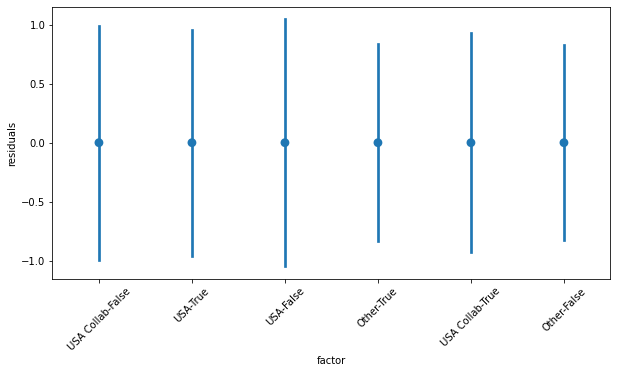

In [63]:
residuals = lm.resid
plt.figure( figsize=(10, 5) )
sns.pointplot( data=movies_df.assign(residuals=residuals, factor=movies_df.apply(lambda row: row.country_category+"-"+str(row.Adult), axis=1)), x="factor", y="residuals", ci="sd", join=False )
plt.xticks(rotation=45)

Podemos observar que los residuos están aproximadamente centrados en cero y que, además, la longitud de las barras que representan las desviaciones típicas es similar. Por tanto, no tenemos indicios para pensar que existan desviaciones grandes con respecto a la asunción de homocedasticidad. De nuevo, se debe tener en cuenta que el análisis de ANOVA tiene cierta robustez a pequeñas desviaciones con respecto a la homocedasticidad. Además, hemos configurado el método de ANOVA para que sea más robusto a este tipo de problemas.

A continuación analizamos de nuevo la normalidad de los residuos para determinar si las subpoblaciones son aproximadamente normales. Utilizamos gráficos de probabilidad normal, histogramas, y estimación de funciones de densidad. De nuevo se puede apreciar que los residuos se comportan de forma aproximadamente normal. Teniendo en cuenta esto y que las muestras son aproximadamente grandes, podemos estar seguros del análisis de ANOVA realizado.

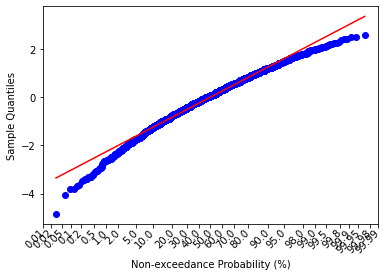

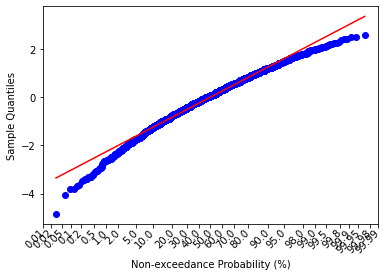

In [64]:
plot = sm.ProbPlot(residuals, dist="norm")
plot.probplot(line="r")

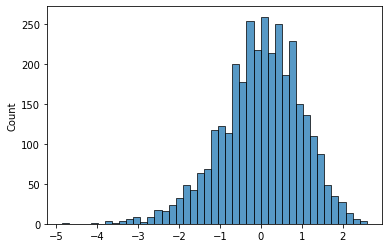

In [65]:
sns.histplot(residuals)

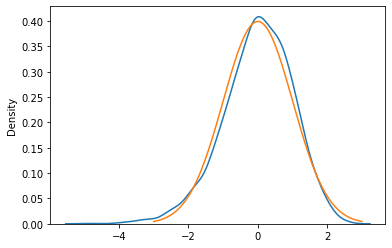

In [66]:
axes = sns.kdeplot( (residuals - residuals.mean() )/(residuals.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

Con lo que has aprendido hasta ahora, vamos a realizar un análisis de ANOVA para determinar si los factores *Age* y *disney*, y sus interacciones, tienen un efecto significativo sobre la media de las puntuaciones de dichas películas en *IMDb*. Hemos preparado un conjunto de datos especial para esta tarea donde hemos eliminado categorías que no tenían muchas muestras para películas disponibles en Disney+. 

In [67]:
disney_df = movies_df[ (movies_df.Age!="18+") & (movies_df.Age!="16+") ]
disney_df = disney_df.assign( disney=movies_df["Disney+"] )
lm = ols( 'IMDb ~ C(Age) + C(disney) + C(Age)*C(disney)', data=disney_df ).fit(cov_type="HC3")
anova_table = sm.stats.anova_lm(lm, typ=2, robust="HC3")
anova_table

,sum_sq,df,F,PR(>F)
C(Age),0.567723,2.0,0.279965,7.558492e-01
C(disney),0.699103,1.0,0.689506,4.064628e-01
C(Age):C(disney),28.449609,2.0,14.029546,9.174890e-07
Residual,1541.154864,1520.0,NaN,NaN


Nótese como hemos empleado el tipo de suma de cuadrados II ya que vamos a estudiar las interacciones de ambos factores. Los factores simples NO han resultado estadísticamente significativos, pero si la interacción. En un análisis de ANOVA debemos mantener los factores simples en el análisis siempre que las interacciones hayan resultado significativas.

Ahora no tendría sentido analizar los intervalos HSD de Tukey, puesto que la interacción es significativa. Es más interesante analizar los gráficos de interacción para ver qué niveles obtienen una respuesta diferente en la media.

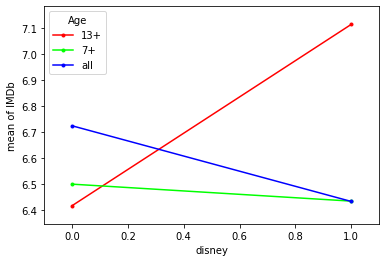

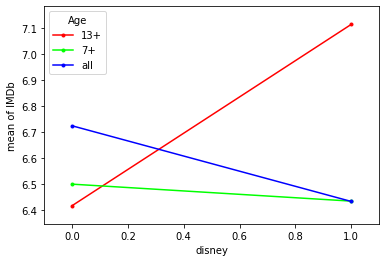

In [68]:
sm.graphics.interaction_plot(x=disney_df.disney, trace=disney_df.Age, response=disney_df.IMDb)

Cuando en un gráfico de interacciones encontramos que las líneas se cruzan estamos ante un caso con una muy fuerte interacción. Por tanto, no tiene sentido analizar la media en los niveles individuales de cada factor. Se deben analizar caso a caso. En este gráfico de interacción se observan cosas realmente interesantes:
* La media de las películas para mayores de 13+ en sensiblemente mayor para aquellas películas seleccionadas para el catálogo de Disney+. Esto tiene sentido. Esta plataforma de streaming suele incluir exclusivamente producciones producidas en la casa, y resulta que en los últimos años muchas de las películas *13+* de la plataforma pertenencen a franquicias altamente valoradas como *Star Wars* o *Marvel*. Parece lógico que la media de las valoraciones en *IMDb* para este catálogo sea sensiblemente mayor que en las películas que no están incluidas, ya que las no incluidas abarcan niveles de calidad más dispares. 
* Las películas para *7+* y *all* en el catálogo de Disney+ tienen calificaciones sensiblemente menores que las películas que no están en catálogo. De nuevo, Disney+ suele emplear muchas producciones de la casa. Aunque Disney+ cuenta con muchas películas de excelente calidad para cines, también es cierto que produce muchas más películas para televisión con una calidad dudosa. Esto puede estar afectando a la media.



Analizamos de nuevo las hipótesis de aplicación del análisis de ANOVA y vemos que no existen fuertes evidencias de fuertes desviaciones de estas hipótesis.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

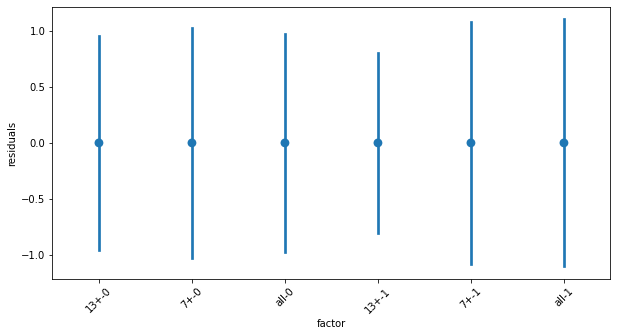

In [69]:
residuals = lm.resid
plt.figure( figsize=(10, 5) )
sns.pointplot( data=disney_df.assign(residuals=residuals, factor=disney_df.apply(lambda row: row.Age+"-"+str(row.disney), axis=1)), x="factor", y="residuals", join=False, ci="sd" )
plt.xticks(rotation=45)

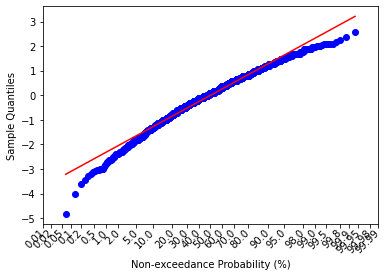

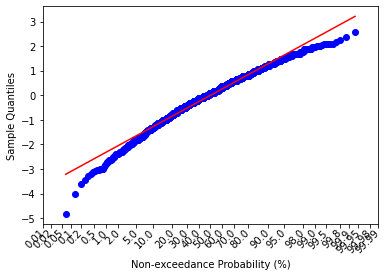

In [70]:
plot = sm.ProbPlot(residuals, dist="norm")
plot.probplot(line="r")

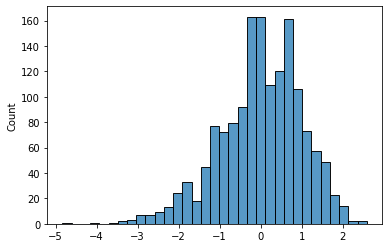

In [71]:
sns.histplot(residuals)

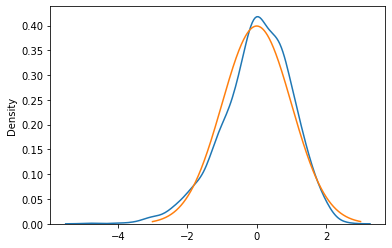

In [72]:
axes = sns.kdeplot( (residuals - residuals.mean() )/(residuals.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )

Ahora realizaremos un análisis similar, tomando como variable de respuesta las puntuaciones en *IMDb* y como factores a incluir la década de la película y si la película se encuentra en Disney+. 

**Realiza un análisis de ANOVA con interacciones. ¿Qué factores individuales son estadísticamente significativos? ¿Es la interacción significativa? ¿Es esta interacción fuerte? ¿qué niveles obtienen una mejor valoración? Contrasta las hipótesis de aplicación de ANOVA**

 - El factor de Disney individual si es estadísticamente significativo, en cambio la de decada no.
 - La interacción como se puede ver en el gráfico de interacciones si que es significativa, y fuerte ya que las lineas se cruzan.
 - Las películas de antes de los noventa, años en los que se sacaron clásicos en Disney y a partir del 2000, que pueden considerarse como las últimas películas son las mejor valoradas, esto puede deberse a que, entre los 1990 y los 2000, se públicaron muchas películas que no causaron mucho impacto.
 - Como podemos ver que los residuos son normales y las subpoblaciones son lo suficientemente grandes como para fiarnos, podemos asegurarnos del ANOVA realizado.

In [78]:
new_df = new_df[ (new_df.Age!="18+") & (new_df.Age!="16+") ]
new_df = new_df.assign( disney=new_df["Disney+"] )
#Tu código aquí
lm = ols( 'IMDb ~ C(decade) + C(disney) + C(decade)*C(disney)', data=new_df ).fit(cov_type="HC3")
anova_table = sm.stats.anova_lm(lm, typ=2, robust="HC3")
anova_table

,sum_sq,df,F,PR(>F)
C(decade),14.623940,3.0,4.834180,0.002373
C(disney),1.645740,1.0,1.632078,0.201634
C(decade):C(disney),28.289868,3.0,9.351673,0.000004
Residual,1372.392950,1361.0,NaN,NaN


6.24723378941107 6.4577160493827135


/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/stats/multicomp.py:787: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  linestyle='None', color='0.5', ecolor='0.5')


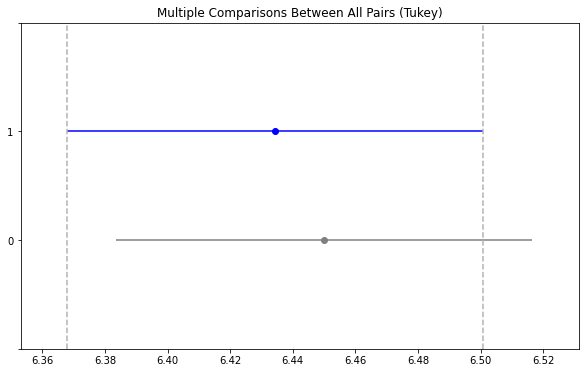

In [82]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(new_df.IMDb, new_df.disney, alpha=0.05)
tukey.plot_simultaneous(comparison_name=1)
print( movies_df[movies_df.Adult].IMDb.mean(), movies_df[movies_df.Adult==False].IMDb.mean() )

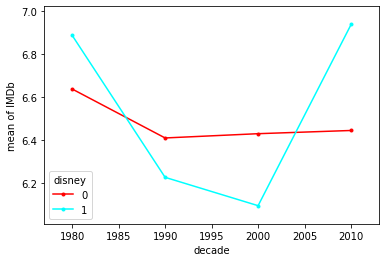

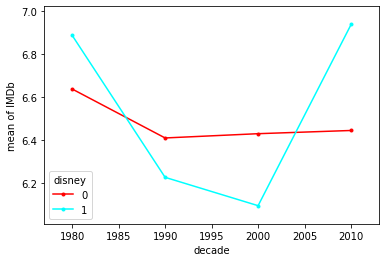

In [81]:
sm.graphics.interaction_plot(x=new_df.decade, trace=new_df.disney, response=new_df.IMDb)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

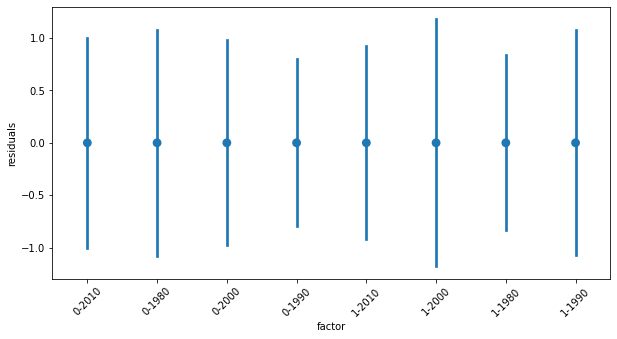

In [88]:
residuals = lm.resid
plt.figure( figsize=(10, 5) )
sns.pointplot( data=new_df.assign(residuals=residuals, factor=new_df.apply(lambda row: str(row.disney)+"-"+str(row.decade), axis=1)), x="factor", y="residuals", ci="sd", join=False )
plt.xticks(rotation=45)

<Figure size 432x288 with 0 Axes>

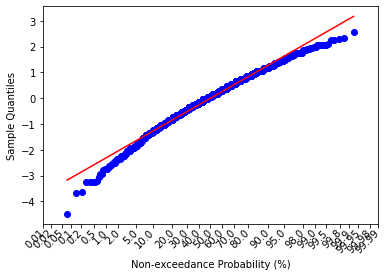

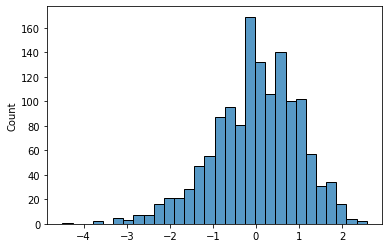

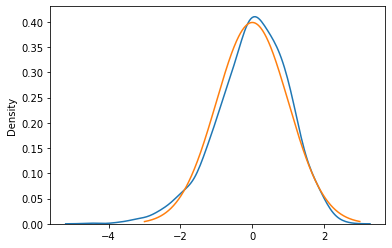

In [90]:
plot = sm.ProbPlot(residuals, dist="norm")
plt.figure()
plot.probplot(line="r")
plt.figure()
sns.histplot(residuals)
plt.figure()
axes = sns.kdeplot( (residuals - residuals.mean() )/(residuals.std()), common_norm=False  )
sns.lineplot( y=[ stats.norm.pdf(x) for x in np.arange(-3, 3, 0.01) ], x= [x for x in np.arange(-3, 3, 0.01)] )